In [1]:
import pandas as pd

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정
pd.set_option('display.max_columns', 500)

In [3]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import
import sqlite3

In [4]:
connection = sqlite3.connect("./zigzag/zigzag_DB.db")
connection

In [5]:
query = "SELECT * FROM 'order'"

order = pd.read_sql(query, connection)

order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [8]:
table = pd.pivot_table(order,
                       index = "shop_id",
                       values = "price", 
                       aggfunc = 'sum')

table = table.sort_values(by = "price", ascending = False)

table.head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = "NanumGothic")

In [11]:
table = pd.pivot_table(order, 
                       index = "shop_id", 
                       values = "price", 
                       aggfunc = ['sum', 'count'])

table.columns = ['sum', 'count']

table = table.sort_values(by = 'sum', ascending = False)

top_table = table.head(10)

top_table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


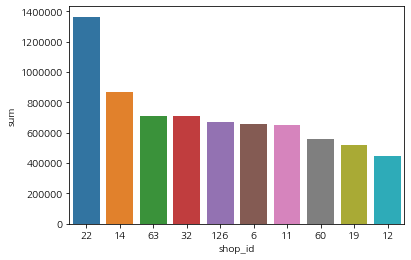

In [12]:
# 피벗테이블 시각화

# sns.barplot(data = top_table, x = "shop_id", y = "sum") #인덱스는 컬럼이 아니기 때문에 오류
sns.barplot(data = top_table, 
            x = top_table.index, 
            y = "sum", 
            order = top_table.index)